In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import desyshowerdisplay

In [4]:
df = pd.read_csv("/home/antonio/Simulations/sim_DESY/RUN3_sim_09_07_20_movingtarget/b000003/RUN3.csv")

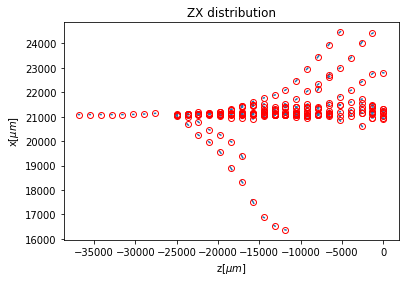

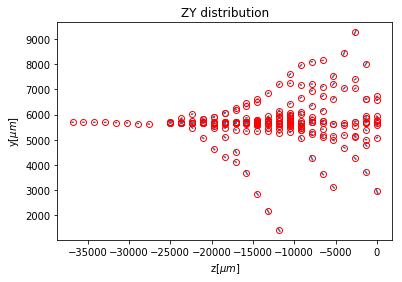

In [5]:
figxz,axisxz = plt.subplots()
figyz,axisyz = plt.subplots()
desyshowerdisplay.displayshower(df,1,"r",axisyz,axisxz)

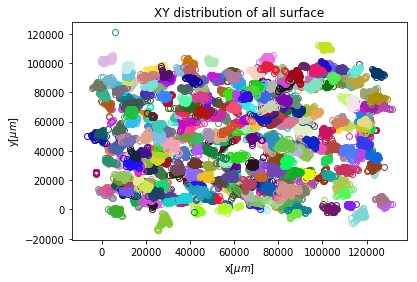

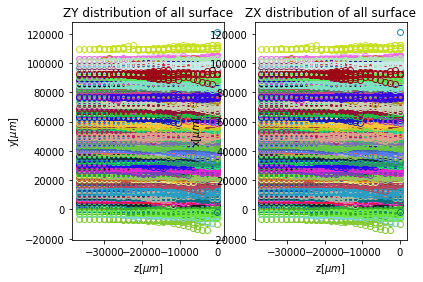

In [6]:
fig1,ax1 = plt.subplots()
fig2,(ax2,ax3) = plt.subplots(1,2)
desyshowerdisplay.drawallshowers(df,360,(ax1,ax2,ax3))